In [32]:
import pandas as pd 
import seaborn as sns


In [2]:
post_course = pd.read_csv('post_course.csv', index_col=0)

post_course.head()

,Student Number,Start Time,Submit Time,Status,Q1,Q2,Q2.1,Q2.2,Q2.3,Q3.1,...,Q4.10,Q5,Q6,Q7.1,Q7.2,Q7.3,Q7.4,Q7.5,Q8,Q9
0,1,2022-09-21 10:47:33.463,2022-09-21 10:49:18.587,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",No answer,No answer,No answer,Agree,...,True but I am not sure,the measure of the difference in potential,the measure of differencei n voltage,Agree,Agree,Agree,Agree,Agree,nil,nil
1,2,2022-09-21 14:45:01.423,2022-09-21 14:53:49.160,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",in Chemistry teaching labs,No answer,Others,Agree,...,False but I am not sure,Analytical tool used to measure the activity o...,An analytical tool to measure the activity of ...,Agree,Agree,Neutral,Strongly Disagree,Disagree,The project was difficult to carry and quite t...,Thank you prof. Sellou for your fun class and ...
2,3,2022-09-23 21:25:41.343,2022-09-23 21:34:24.110,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",No answer,No answer,No answer,Agree,...,False but I am not sure,the reaction occurs due to differences in elec...,analytical quantification method based on the ...,Agree,Agree,Neutral,Neutral,Agree,Those are really fun experiments!,NIL
3,5,2022-09-21 13:55:39.683,2022-09-21 14:24:52.207,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",in Chemistry teaching labs,No answer,No answer,Agree,...,"True, I am confident",The measure of voltage between two half cell t...,It is the measurement of current when a forced...,Neutral,Disagree,Disagree,Disagree,Strongly Disagree,"Firstly, the instructions were not very clear ...",Please take note that the assessment of the pr...
4,6,2022-09-20 21:04:34.863,2022-09-20 21:18:33.347,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",in Chemistry teaching labs,No answer,No answer,Agree,...,"False, I am confident","Potentiometry, electrolytic cell without batte...",Voltammetry (Electrolysis with potential appli...,Agree,Agree,Strongly Disagree,Agree,Neutral,The hands-on tutorial and project were a good ...,nil


In [3]:
post_course_q7 = post_course.filter(regex='Q7')
post_course_q7.head(10)


d = {}
for i in range(len(post_course_q7.columns)):
    key = post_course_q7.columns[i]
    value = f"K{i+1}"
    d[key] = value

post_course_q7.rename(columns = d, inplace = True)

C:\Users\chiak\AppData\Local\Temp\ipykernel_17152\292655290.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_course_q7.rename(columns = d, inplace = True)


In [4]:
post_course_q7 = post_course_q7.drop(6)
post_course_q7.reset_index(inplace=True, drop = True)

scale = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

c:\Users\chiak\AppData\Local\Programs\Python\Python311\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


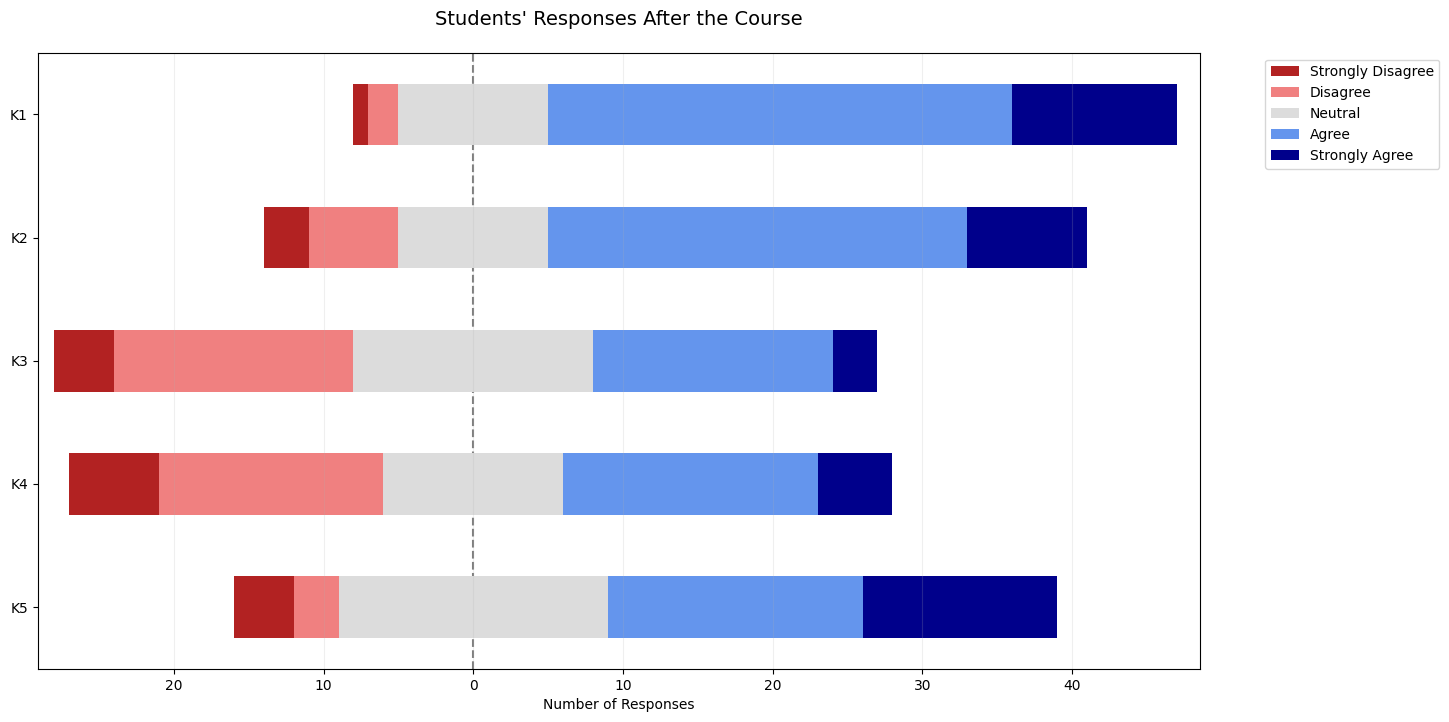

In [31]:
import matplotlib.pyplot as plt 
import plot_likert

axes = plot_likert.plot_likert(
    post_course_q7, 
    scale,
    figsize=(15, 8),  # Wider figure for better readability
    xtick_interval=10,  # Show ticks at 10% intervals
    label_max_width=50,  # Wrap long labels at 50 characters
)

# Customize the plot further
axes.set_title("Students' Responses After the Course", pad=20, fontsize=14)
axes.grid(axis='x', alpha=0.2)  # Light grid lines for easier reading

# Save with high quality
plt.savefig(
    'Divergent Barchart.jpg', 
    dpi=1920, 
    bbox_inches="tight",
    facecolor='white'
)
plt.show()

In [7]:
post_course_q7_sum = pd.DataFrame()
for column in post_course_q7:
    series = pd.Series(post_course_q7[column].value_counts())
    post_course_q7_sum = pd.concat([post_course_q7_sum, series], axis = 1)


post_course_q7_sum = post_course_q7_sum.T
post_course_q7_sum = post_course_q7_sum[["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"]]
post_course_q7_sum = post_course_q7_sum.iloc[::-1]
post_course_q7_sum

,Strongly Disagree,Disagree,Neutral,Agree,Strongly Agree
count,4,3,18,17,13
count,6,15,12,17,5
count,4,16,16,16,3
count,3,6,10,28,8
count,1,2,10,31,11


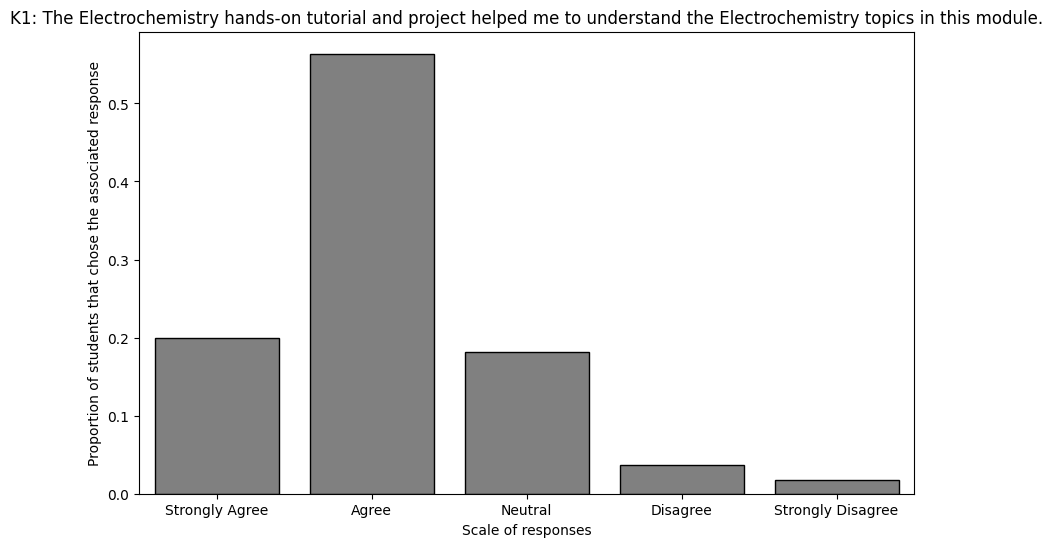

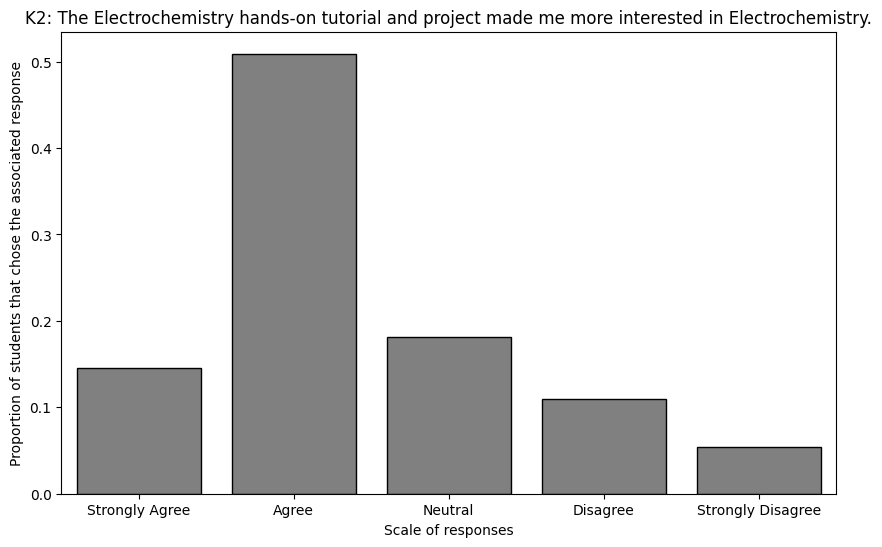

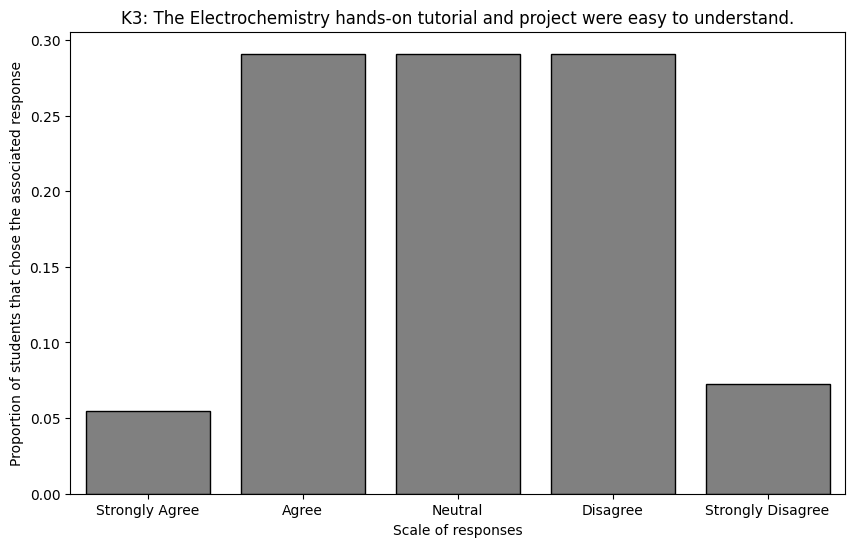

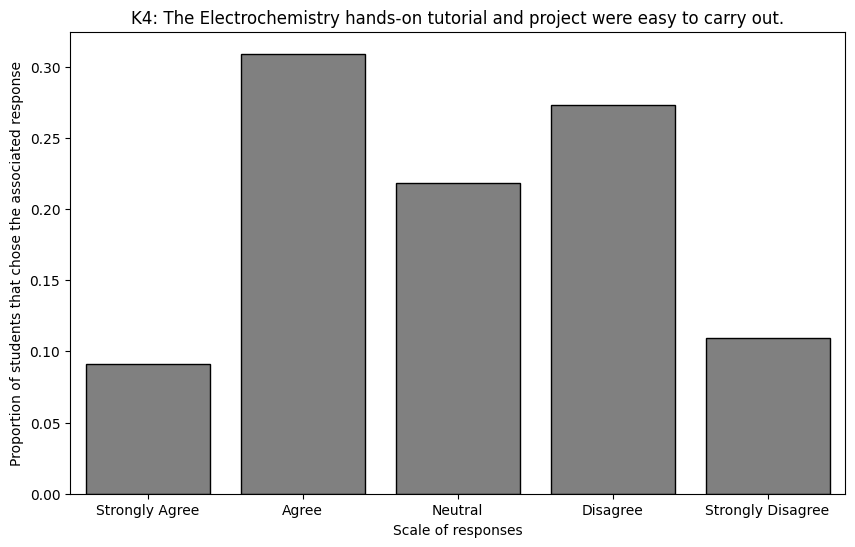

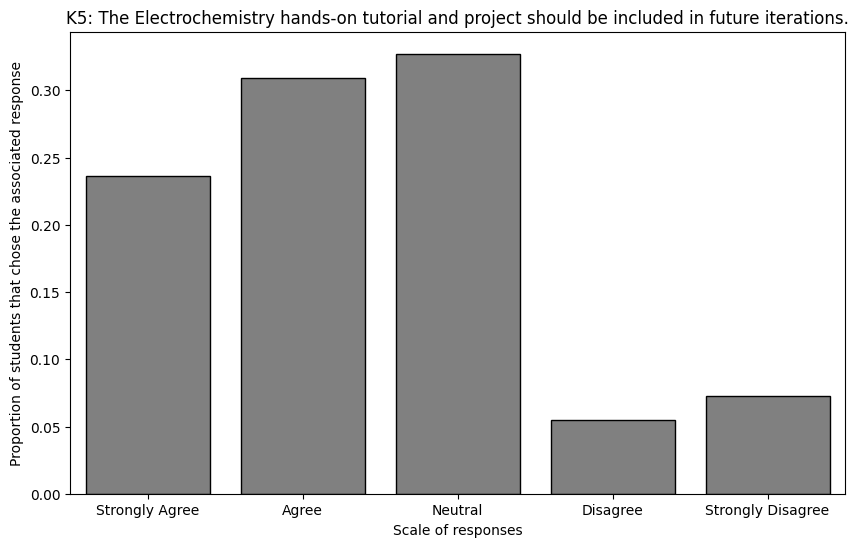

In [37]:
for i in range(len(post_course_q7.columns)):
    question_list = ["The Electrochemistry hands-on tutorial and project helped me to understand the Electrochemistry topics in this module.",
                    "The Electrochemistry hands-on tutorial and project made me more interested in Electrochemistry.",
                    "The Electrochemistry hands-on tutorial and project were easy to understand.",
                    "The Electrochemistry hands-on tutorial and project were easy to carry out.",
                    "The Electrochemistry hands-on tutorial and project should be included in future iterations."]
    
    col = post_course_q7.columns[i]
    question = question_list[i]
    
    plt.figure(figsize=(10,6))
    
    q7_value_counts = post_course_q7[col].value_counts(normalize = True)
    
    sns.barplot(
        x=q7_value_counts.index, 
        y=q7_value_counts, 
        order=['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree'],
        color='grey',
        edgecolor='black',
        linewidth=1
    )
    
    title_name = f"{col}: {question}"
    plt.title(title_name)
    plt.xlabel("Scale of responses")
    plt.ylabel("Proportion of students that chose the associated response")
    
    filename = f"Q7_{i+1}_responses.png"  # Creates filenames like Q7_1_responses.png, Q7_2_responses.png, etc.
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close() 